Command Profile in TVB
----------------------

This is a simple demo showing for to interract with TVB in the command profile.

More examples can be found here:
https://github.com/the-virtual-brain/tvb-framework/tree/master/tvb/interfaces/command/demos

In [1]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.COMMAND_PROFILE)
from tvb.interfaces.command.lab import *

2019-10-15 22:45:04,127 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.time_series.TimeSeries.labels_dimensions = Attr(field_type=<class 'dict'>, default={}, required=True)
2019-10-15 22:45:04,178 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.projections.ProjectionMatrix.conductances = Attr(field_type=<class 'dict'>, default={'air': 0.0, 'skin': 1.0, 'skull': 0.01, 'brain': 1.0}, required=False)
2019-10-15 22:45:05,167 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required

2019-10-15 22:45:09,244 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.linear.Linear.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-1,  1])}, required=True)
2019-10-15 22:45:09,248 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.oscillator.Generic2dOscillator.gamma = NArray(label=':math:`\\gamma`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2019-10-15 22:45:09,250 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.oscillator.Generic2dOscillator.state_variable_range = Final(field_type=<class 'dict'>, default={'V': array([-2.,  4.]), 'W': array([-6.,  6.])}, required=True)
2019-10-15 22:45:09,487 - WARNING - tvb.traits - Field seems mutable and has a default v

In [2]:
list_projects()

                    name    id
         Default_Project     1


Create a new project to test with

In [3]:
proj = new_project("sandbox")

If you have the web UI open at the same time, you'll notice there's now a new project named "sandbox"

In [4]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date


Nothing! Let's import a connectivity

In [5]:
import os
import tvb_data
p = os.path.join(os.path.dirname(tvb_data.__file__), 'connectivity/connectivity_66.zip')
import_conn_zip(proj.id, p)

2019-10-15 22:45:13,108 - INFO - tvb.core.services.flow_service - Starting operation ZIPConnectivityImporter
2019-10-15 22:45:13,369 - INFO - tvb.core.services.flow_service - Finished operation launch:ZIPConnectivityImporter


In [6]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date
       ConnectivityIndex                     21 8940cdaf5722404f94d72649631f5c38 2019-10-15 22:45:13.323371


Now let's grab that connectivity from the database. 
IMPORTANT: Make sure to adjust the DT id below to match the value in the id column above

In [9]:
conn = load_dt(21)
conn

,value
Number of connections,1377
Number of regions,66
Undirected,False
is None,True
"tract_lengths (connections) [min, median, max]","[7, 78.8134, 238]"
"tract_lengths [min, median, max]","[0, 0, 238]"
"tract_lengths-non-zero [min, median, max]","[7, 78.8134, 238]"
"weights [min, median, max]","[0, 0, 0.512165]"
weights dtype,float64
weights shape,"(66, 66)"


and run a simulation with it

In [10]:
params = dict(connectivity=conn)
sim_op = fire_simulation(project_id=proj.id, connectivity=conn, simulation_length=100)

We should wait for the simulation to finish, and afterwards, TimeSeries should also be part of this project.

Refresh the Web GUI to see the status of your operation.

In [12]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date
       ConnectivityIndex                     21 8940cdaf5722404f94d72649631f5c38 2019-10-15 22:45:13.323371
          SimulatorIndex             None    22 3893c240df314624be0be58d93e18181 2019-10-15 22:45:41.273255
    SimulationStateIndex                     23 d7c3529677d3482494b3e37863e788a2 2019-10-15 22:45:52.124081
   TimeSeriesRegionIndex                     24 2b278fcf40b54b33a650c2715ddf1b17 2019-10-15 22:45:52.191838


Populating the interactive namespace from numpy and matplotlib


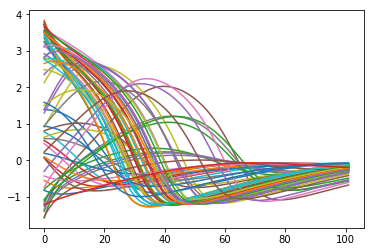

In [19]:
%pylab inline
import matplotlib.pyplot as plt

ts  = load_dt(24)
for reg in range(66):
    plt.plot(ts.data[:, 0, reg, 0])
plt.show()

You can re-evaluate this cell multiple times while it's running to see how the results gradually show up as the simulation finishes.